In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import imageio
import os

In [825]:
class City:
    def __init__(self, MAP_SIZE=10, buff=None):
        
        self.ALIVE, self.DEAD = (1, 0)
        
        if buff is None:
            self.data = np.repeat(self.DEAD, MAP_SIZE**2) \
                                .reshape([MAP_SIZE]*2)
        
            num_of_alive = MAP_SIZE**2 // 10
        
            for _ in range(num_of_alive):
                x, y = random.randint(0, MAP_SIZE), random.randint(0, MAP_SIZE)
                self.data[x,y] = self.ALIVE 

        else:
            self.data = buff
            
        self.color_map = cm.binary
        self.dim = MAP_SIZE if buff is None else buff.shape[0]
        
#         self.plot_map()
        
    def plot_map(self):
        
        fig, ax = subplots(figsize=(14, 11))

        ax.imshow(self.data, cmap=self.color_map)

        axis('off')
        show()

    def count_alive_neighbors(self, i, j):
        
        full_list = [
            [i-1, j-1],
            [i-1, j],
            [i-1, j+1],
            [i, j-1],
            [i, j+1],
            [i+1, j-1],
            [i+1, j],
            [i+1, j+1]
        ]
        
        for i, _ in enumerate(full_list):
            full_list[i][0] = (full_list[i][0] + self.dim) % self.dim
            full_list[i][1] = (full_list[i][1] + self.dim) % self.dim

        num_of_alive = 0
        for y, x in full_list:
            if self.data[y, x] == self.ALIVE:
                num_of_alive += 1
        
        return num_of_alive

    def get_next_step(self):
        
        temp_arr = np.zeros_like(self.data)
    
        for y in range(self.data.shape[0]):
            for x in range(self.data.shape[1]):
                
                n = self.count_alive_neighbors(y, x)
                
                if self.data[y,x] == self.ALIVE and n in [2, 3]:
                    temp_arr[y,x] = self.ALIVE
                
                elif self.data[y,x] == self.DEAD and n == 3:
                    temp_arr[y,x] = self.ALIVE
                    
        self.data = temp_arr
               
        alive, _ = np.where(self.data == self.ALIVE)
            
        return len(alive) 

    def save_gif(self, n_epochs, output_fname=None):
        
        if output_fname is None:
            raise Exception
        
        figure(figsize=(14, 11))
        
        dir_name = 'pics/'
        
        if os.path.isdir(dir_name):
            os.system(f'rm -rf {dir_name}')
        os.mkdir(dir_name)

        filenames = []
        for index in range(n_epochs):
            
            self.get_next_step()
            fname = f'gol_{str(index).zfill(4)}.png'
            
            imshow(self.data, cmap=self.color_map, aspect='auto')
            axis('off')
            
            savefig(f'{dir_name}{fname}', dpi=150, bbox_inches='tight')
            
            filenames.append(fname)
        
        images = []
        for filename in filenames:
            images.append(imageio.imread(f'{dir_name}{filename}'))
        
        imageio.mimsave(f'{output_fname}.gif', images)
        print('GIF saved')

In [779]:
city_obj = City(100)

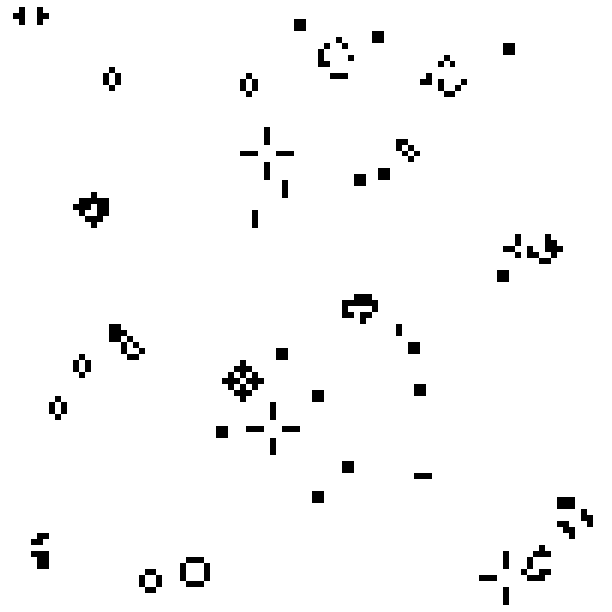

In [780]:
n_steps = 10

for _ in range(n_steps):
    city_obj.get_next_step()

city_obj.plot_map()

### 1) Default game

GIF saved


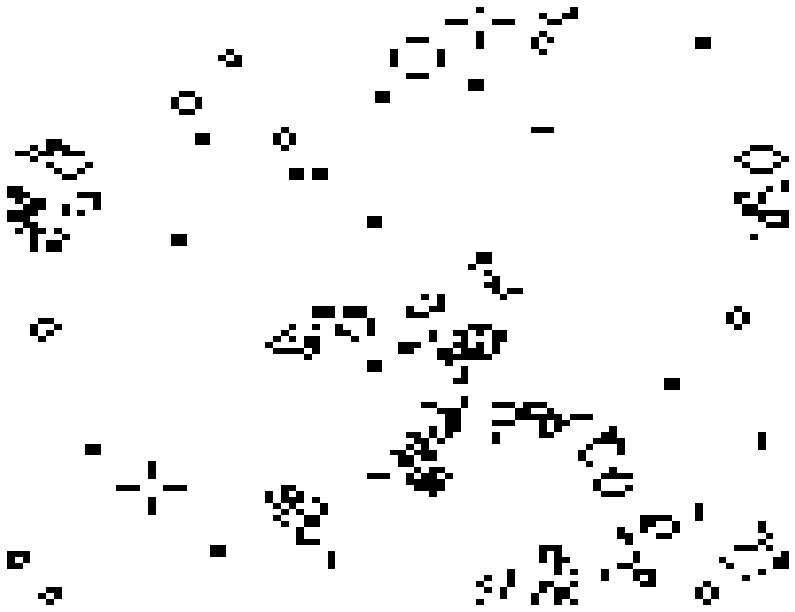

In [783]:
NUM_EPOCHS = 100

city_obj = City(100)
city_obj.save_gif(n_epochs=NUM_EPOCHS, output_fname='def_gol')

### 4) Gosper gun

GIF saved


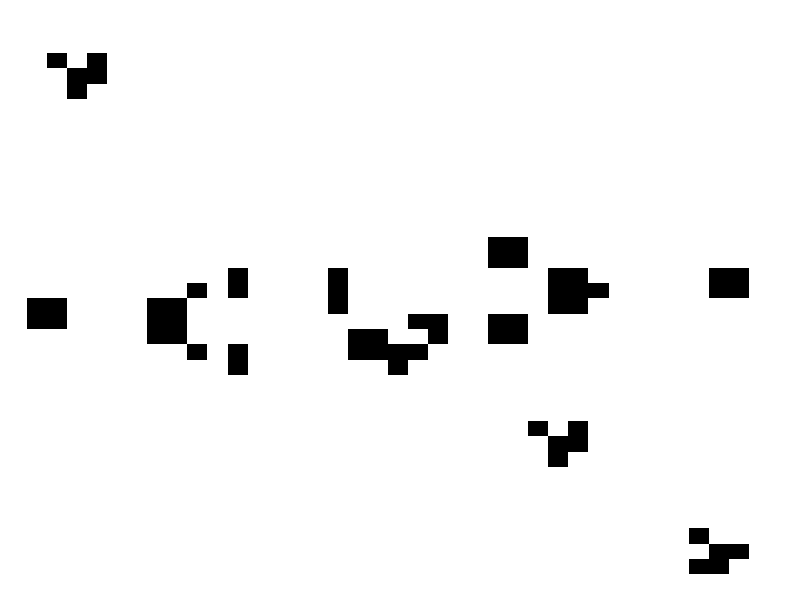

In [784]:
gosper_list = []

with open('gosper.csv', 'r') as f:
    for line in f:
        tmp = []
        
        for character in line:
            val = 1 if character == 'X' else 0
            tmp.append(val)
            
        gosper_list.append(np.array(tmp))

gosper_array = np.array(gosper_list, dtype=np.uint8)

NUM_EPOCHS = 100

city_obj = City(buff=gosper_array)
city_obj.save_gif(n_epochs=NUM_EPOCHS, output_fname='gosper_gol')

### 5)

#### Pulsar

In [797]:
pulsar_list = []

with open('pulsar.csv', 'r') as f:
    for line in f:
        tmp = []
        
        for character in line:
            val = 1 if character == 'X' else 0
            tmp.append(val)
            
        pulsar_list.append(np.array(tmp))

pulsar_array = np.array(pulsar_list, dtype=np.uint8)
pulsar_array.shape

(39, 39)

GIF saved


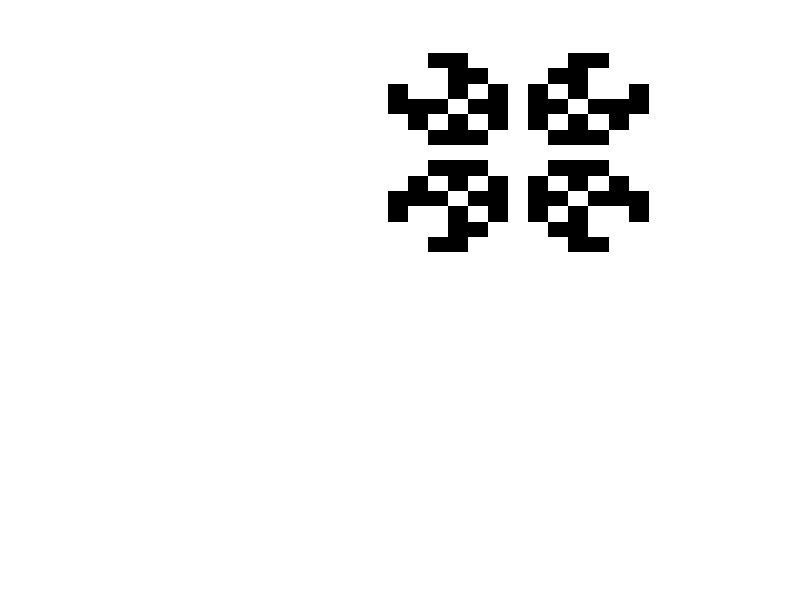

In [836]:
NUM_EPOCHS = 100

city_obj = City(buff=pulsar_array)
city_obj.save_gif(n_epochs=NUM_EPOCHS, output_fname='pulsar_gol')

#### Glider

In [798]:
glider_list = []

with open('glider.csv', 'r') as f:
    for line in f:
        tmp = []
        
        for character in line:
            val = 1 if character == 'X' else 0
            tmp.append(val)
            
        glider_list.append(np.array(tmp))

glider_array = np.array(glider_list, dtype=np.uint8)
glider_array.shape

(39, 39)

GIF saved


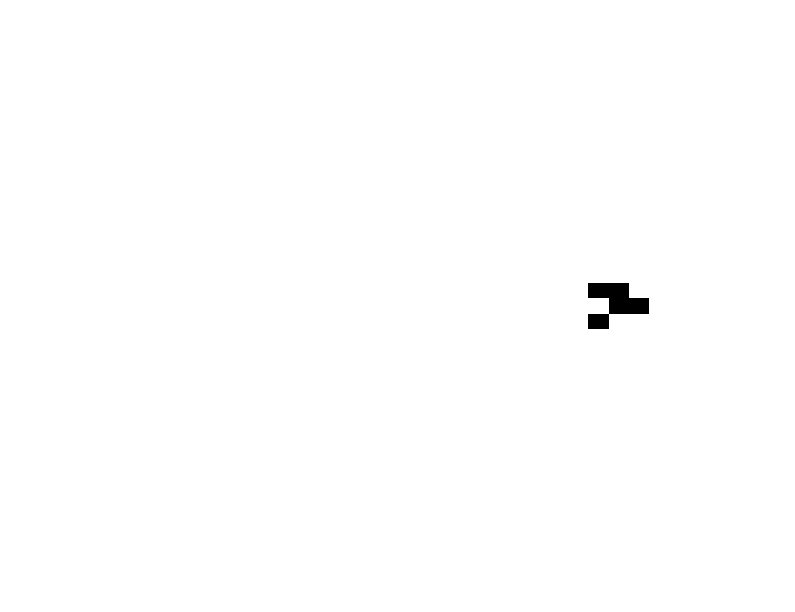

In [837]:
NUM_EPOCHS = 100

city_obj = City(buff=glider_array)
city_obj.save_gif(n_epochs=NUM_EPOCHS, output_fname='glider_gol')

### 6)

In [805]:
res = np.vstack((gosper_array, pulsar_array, glider_array))
res.shape

(117, 39)

In [814]:
dim = res.shape[0] - res.shape[1]

for _ in range(dim):
    arr = np.zeros(res.shape[0]).reshape(-1, 1)
    res = np.hstack((res, arr))

In [815]:
res.shape

(117, 117)

In [827]:
NUM_EPOCHS = 100

city_obj = City(buff=res)
    
alives_list = []
times_list = []
    
for i in range(NUM_EPOCHS):
    alives_list.append(city_obj.get_next_step())
    times_list.append(i)

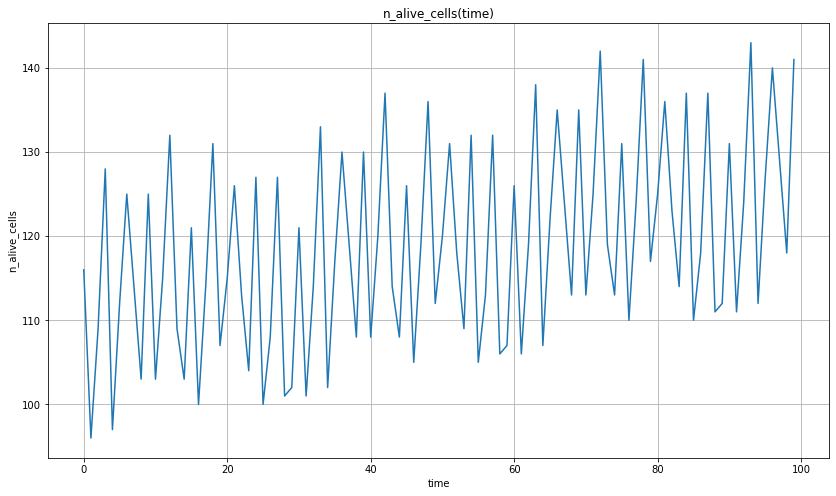

In [834]:
figure(figsize=(14, 8))

xlabel('time')
ylabel('n_alive_cells')
title('n_alive_cells(time)')

plot(times_list, alives_list)
grid() 
    
show()

GIF saved


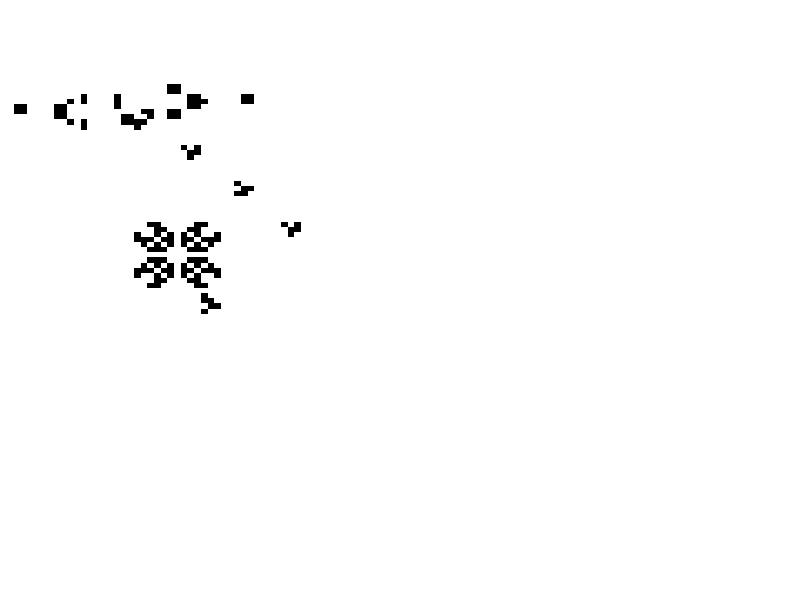

In [838]:
NUM_EPOCHS = 100

city_obj = City(buff=res)
city_obj.save_gif(n_epochs=NUM_EPOCHS, output_fname='bick_dick_gol')